<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:100%;font-family:Verdana;text-align:center;display:fill;border-radius:15px;background-color:dodgerblue;letter-spacing:1px;overflow:hidden"><b> STARTUP DATASET</b></div>

<p style="text-align: center"><font color='Magenta'> <b>DS-4</b><font color='black'><p>
    
<p style="text-align: center;"><font color='dodgerblue'> <b>Data Analytics Final Project  | May 2024</b><font color='orange'><p>


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">


    
<h3 align="left"><font color=dodgerblue> Understand some of the most Interesting Patterns of Funding and Startups. </font></h3>
    
- Using the **'startup_funding.csv'** included in the course package, write a python script to perform the following tasks:


**How Does the Funding Ecosystem changes with respect to Time?**

**What is the General Amount that Startups get in India?**

**Which Kind of Industries are more preferred for Startups?**

**Does Location also play a role, In determining the Growth of a Startup?**

**Who plays the main role in Indian Startups Ecosystem?**

**What are the different Types of Funding for Startups?**

# Data Reading & Cleaning

Açıklama:

Hindistan dünyanın en hızlı büyüyen ekonomilerinden biridir. Son yıllarda Hint girişim ekosisteminde küresel çapta etki yaratan çok sayıda "unicorn" girişimin yükselişine tanık olduk.

Bu not defterinde, Hint girişim fonlama veri seti üzerinde keşifsel veri analizi (EDA) gerçekleştireceğiz, bazı çıkarımlar yapacağız ve Hint girişim ekosistemi hakkında belirli soruları yanıtlamaya çalışacağız.

In [1]:
# Import Libraries
import pandas as pd # type: ignore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
dataset = pd.read_csv('startup_funding.csv')

## Adım 1: Veri Setini Anlamak

In [3]:
# Veri Setinin Ön İzlemesi
dataset.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
# Veri Setinin Boyutları - (rows, columns)
dataset.shape

(3044, 10)

In [5]:
# Veri Tipi Özellikleri
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [6]:
# Null Değerlerin kontrol edilmesi
(dataset.isnull().sum() / dataset.shape[0] * 100).sort_values(ascending = False).round(2).astype(str) + ' %'

Remarks              86.24 %
Amount in USD        31.54 %
SubVertical          30.75 %
City  Location        5.91 %
Industry Vertical     5.62 %
Investors Name        0.79 %
InvestmentnType       0.13 %
Sr No                  0.0 %
Date dd/mm/yyyy        0.0 %
Startup Name           0.0 %
dtype: object

### Gözlemler:

Bağımlı değişken olan 'Amount in USD' (ABD Doları cinsinden miktar) üzerinde bazı ön işlemler yapılması gerekiyor; virgüllerin kaldırılması ve boş değerlerle ilgilenilmesi gibi.

'Date' (Tarih) özelliğinin ön işleme tabi tutulması ve grafikler oluşturmak için kullanışlı olması adına sayısal formata dönüştürülmesi gerekiyor.

'Remarks' (Açıklamalar) özelliği yaklaşık %86,23 oranında boş değer içeriyor, dolayısıyla bunu kaldırabiliriz.

## Adım 2 Veri Ön İşleme

In [7]:
#'Amount in USD' kolonundan virgüllerin değştirilmesi
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x: str(x).replace(',', ''))

In [8]:
# 'Amount in USD' kolonundan hatalı değerlerin düzeltilmesi
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("undisclosed", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("Undisclosed", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("unknown", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("14342000+", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa010000000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa05000000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa019350000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0600000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa020000000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0N/A", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa016200000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0685000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("nan", "0"))


In [9]:
# Sayısal veriye dönüştürülmesi
dataset['Amount in USD'] = pd.to_numeric(dataset['Amount in USD'])

In [10]:
# 'Amount in USD' en çok görülen değerlerin tespit edilmesi
dataset['Amount in USD'].value_counts(normalize = True).head(10).mul(100).round(2).astype(str) + ' %'

Amount in USD
0.0           32.16 %
1000000.0      5.45 %
500000.0       3.55 %
2000000.0      2.27 %
3000000.0      2.17 %
5000000.0      2.17 %
10000000.0     1.97 %
100000.0       1.87 %
150000.0       1.48 %
200000.0       1.45 %
Name: proportion, dtype: object

In [11]:
# 'Amount in USD' 0 değerlerinin boş değerlerle değiştirilmesi
dataset['Amount in USD'] = dataset['Amount in USD'].replace(0, np.nan)

In [12]:
# Boş değerleri ortalama ile değiştirme
dataset['Amount in USD'].fillna(dataset['Amount in USD'].mean(), inplace = True)

In [13]:
# Tarih sütunundaki hatalı değerlerin düzeltilmesi
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '12/05.2015'] = '12/05/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '13/04.2015'] = '13/04/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '15/01.2015'] = '15/01/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '22/01//2015'] = '22/01/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '05/072018'] = '05/07/2018'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '01/07/015'] = '01/07/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '05/072018'] = '05/07/2018'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '\\xc2\\xa010/7/2015'] = '10/07/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

In [14]:
# Tarih formatını belirterek datetime tipine dönüştürelim
dataset['Date dd/mm/yyyy'] = pd.to_datetime(dataset['Date dd/mm/yyyy'], format='%d/%m/%Y', errors='coerce')

# 'Year Month' sütununu oluşturmak
dataset['Year Month'] = (dataset['Date dd/mm/yyyy'].dt.year * 100) + dataset['Date dd/mm/yyyy'].dt.month

# Dönüştürme işleminin başarılı olduğunu kontrol edelim
dataset[['Date dd/mm/yyyy', 'Year Month']].head()

,Date dd/mm/yyyy,Year Month
0,2020-01-09,202001
1,2020-01-13,202001
2,2020-01-09,202001
3,2020-01-02,202001
4,2020-01-02,202001


In [15]:
# 'Remarks' kolonunun % 86.24 ü boş değerlerden oluşuyor o yüzden bu satırı kaldıryoruz
dataset.drop('Remarks', axis = 1, inplace = True)

In [16]:
# Data sette kullanılan 'Bengaluru' yerine daha yaygın bir isim olan  'Bangalore' ile değiştirilmesi 
dataset['City  Location'][dataset['City  Location'] == 'Bengaluru'] = 'Bangalore'

In [17]:
# 'Undisclosed investors' kolonunda yer alan ismin'Undisclosed Investors' ile değiştirilmesi
dataset['Investors Name'][dataset['Investors Name'] == 'Undisclosed investors'] = 'Undisclosed Investors'
dataset['Investors Name'][dataset['Investors Name'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
dataset['Investors Name'][dataset['Investors Name'] == 'undisclosed investors'] = 'Undisclosed Investors'
dataset['Investors Name'][dataset['Investors Name'] == 'Undisclosed'] = 'Undisclosed Investors'

In [18]:
# 'Ola Cabs' daki boşluğun kaldırılması. 
dataset['Startup Name'][dataset['Startup Name'] == 'Ola Cabs'] = 'OlaCabs'

In [19]:
# Daha yaygın kullanılan bir kelimeyle değiştirme
dataset['InvestmentnType'][dataset['InvestmentnType'] == 'Seed/ Angel Funding'] = 'Seed / Angel Funding'
dataset['InvestmentnType'][dataset['InvestmentnType'] == 'Seed\\\\nFunding'] = 'Seed Funding'
dataset['InvestmentnType'][dataset['InvestmentnType'] == 'Seed/ Angel Funding'] = 'Seed / Angel Funding'
dataset['InvestmentnType'][dataset['InvestmentnType'] == 'Seed/Angel Funding'] = 'Seed / Angel Funding'
dataset['InvestmentnType'][dataset['InvestmentnType'] == 'Angel / Seed Funding'] = 'Seed / Angel Funding'

## 3. Keşif Amaçlı Veri Analizi

# How Does the Funding Ecosystem changes with respect to Time? (Finansman Ekosistemi Zamana Göre Nasıl Değişiyor?)


In [20]:

months = dataset['Year Month'].value_counts()

In [21]:
print('Aylara Göre Ortalama Finansman Sayısı',months.values.mean())

Aylara Göre Ortalama Finansman Sayısı 50.733333333333334


In [22]:
print('Bir Ayda En Düşük Finansman Sayısı',months.values.min())

Bir Ayda En Düşük Finansman Sayısı 3


In [23]:
print('Bir Ayda Maksimum Finansman Sayısı',months.values.max())

Bir Ayda Maksimum Finansman Sayısı 104


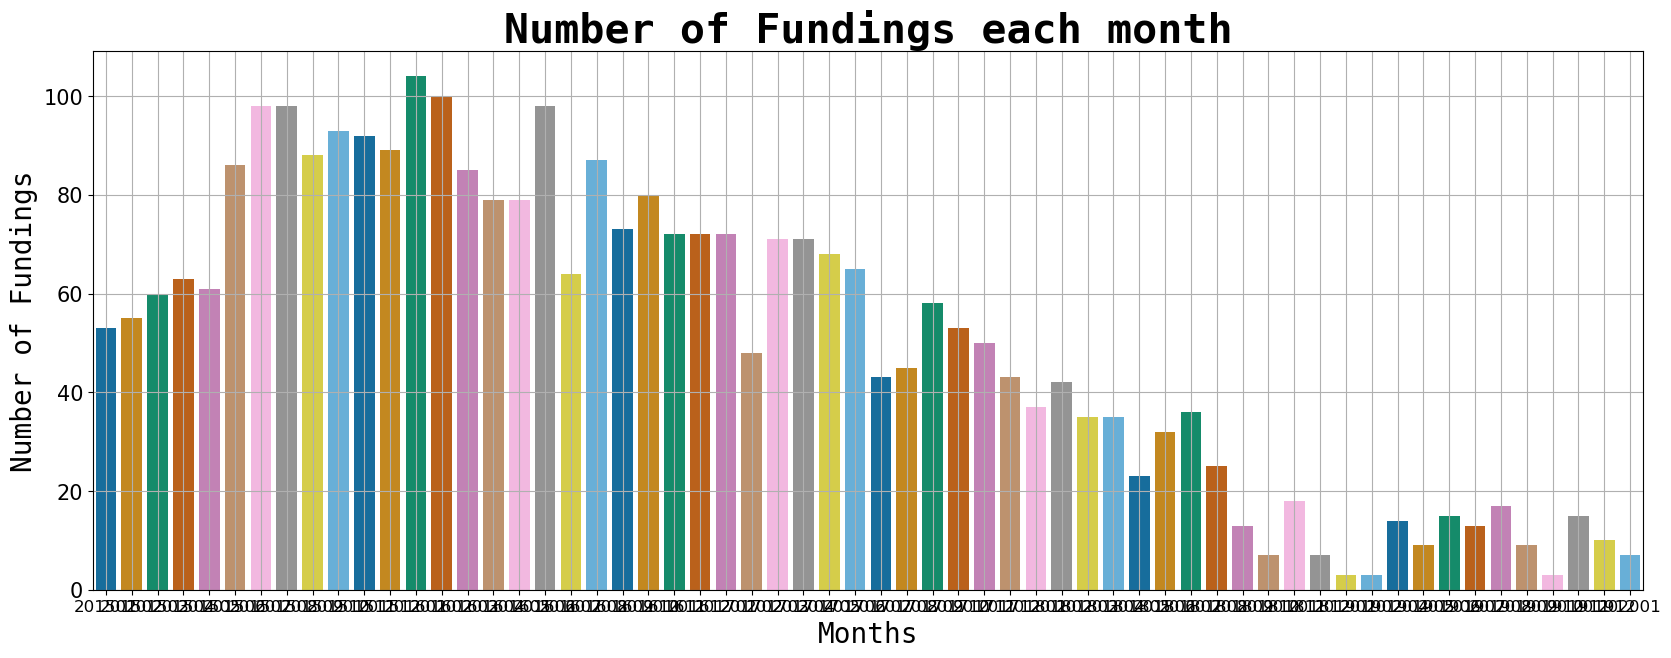

In [25]:
# Aylara göre barplot çizilmesi
plt.figure(figsize=(20, 7))

sns.barplot(x=months.index, y=months.values, palette='colorblind')

plt.title('Number of Fundings each month', fontdict={'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})

plt.xlabel('Months', fontdict={'fontname': 'Monospace', 'fontsize': 20})

plt.ylabel('Number of Fundings', fontdict={'fontname': 'Monospace', 'fontsize': 20})

plt.tick_params(axis='x', labelsize=12)

plt.tick_params(axis='y', labelsize=15)

plt.grid()

plt.show()

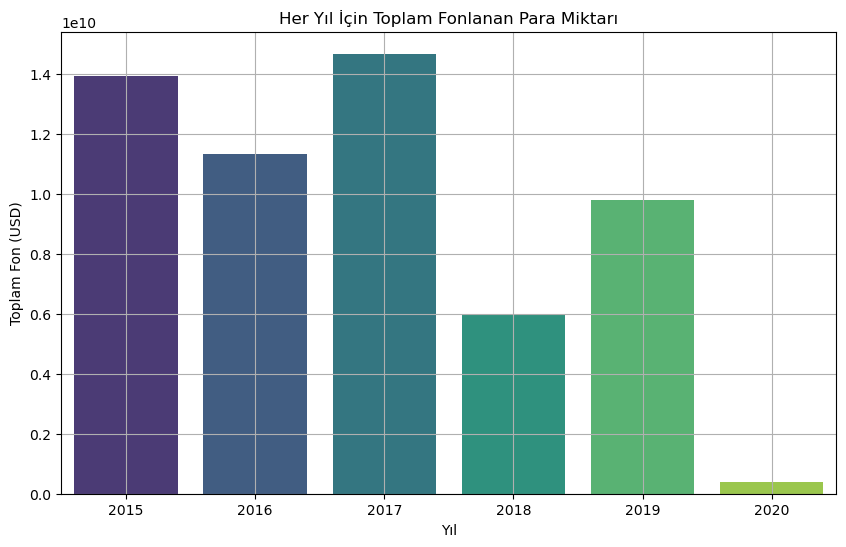

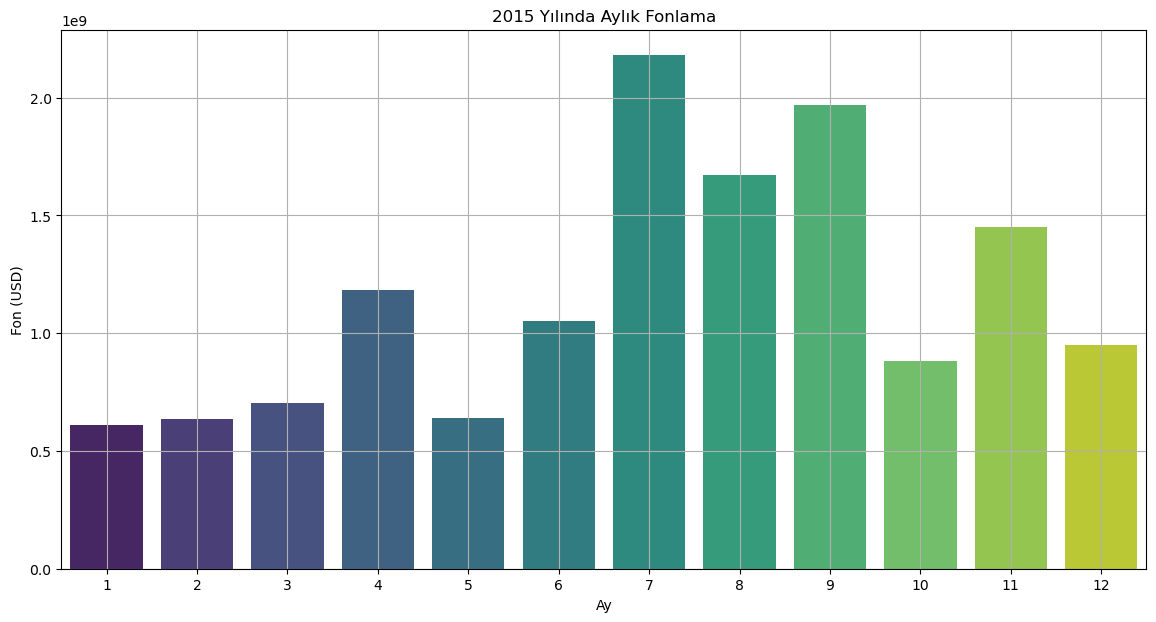

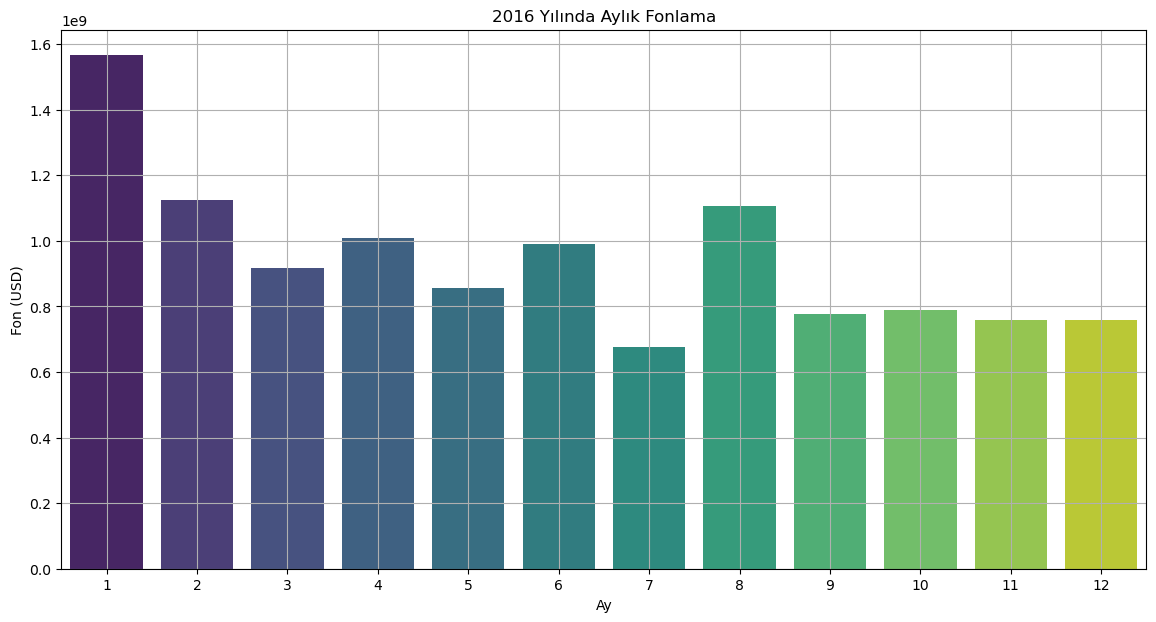

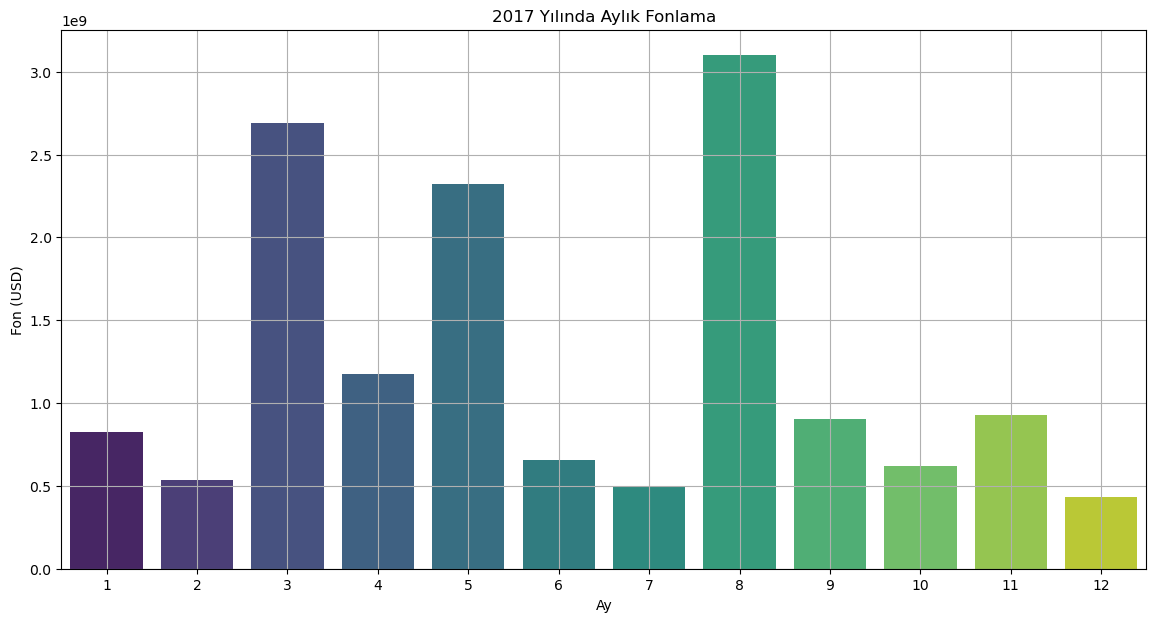

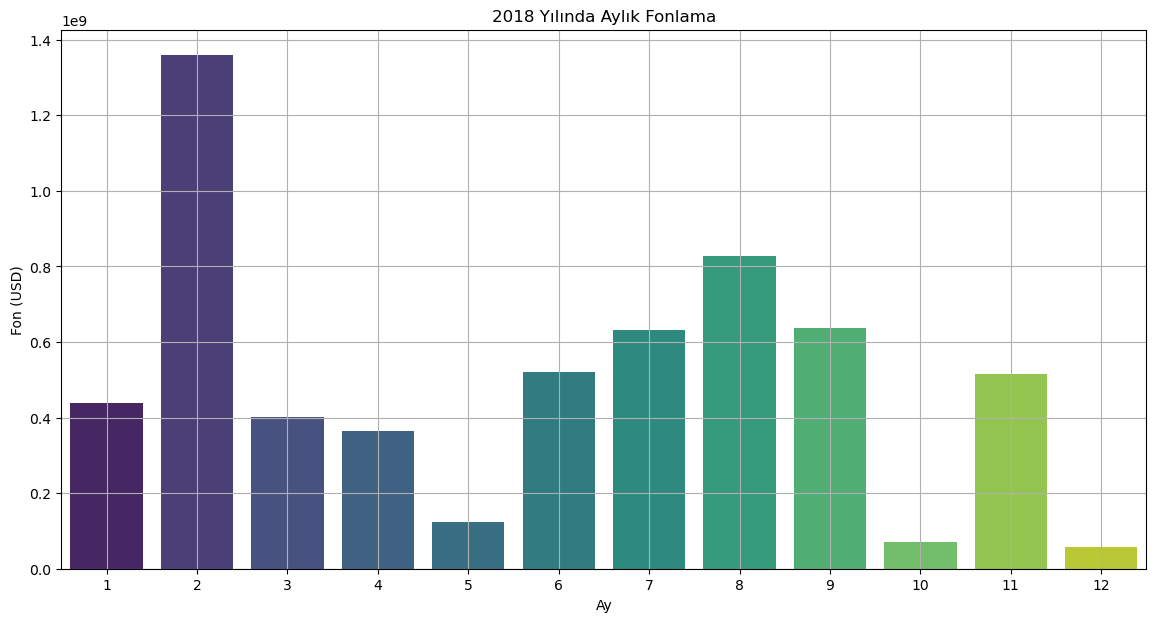

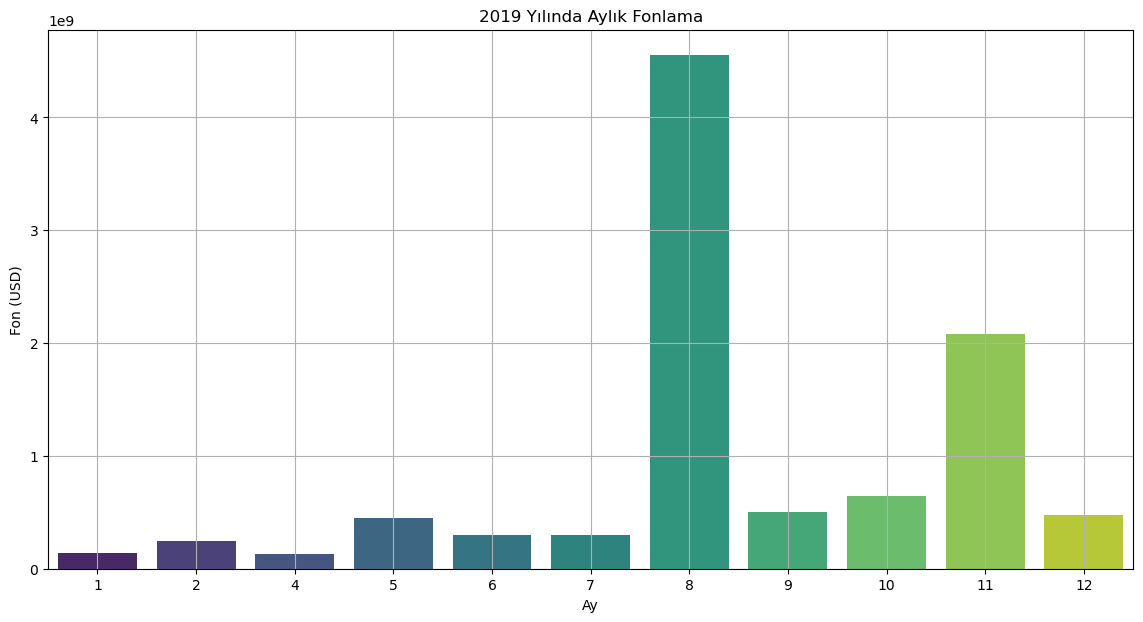

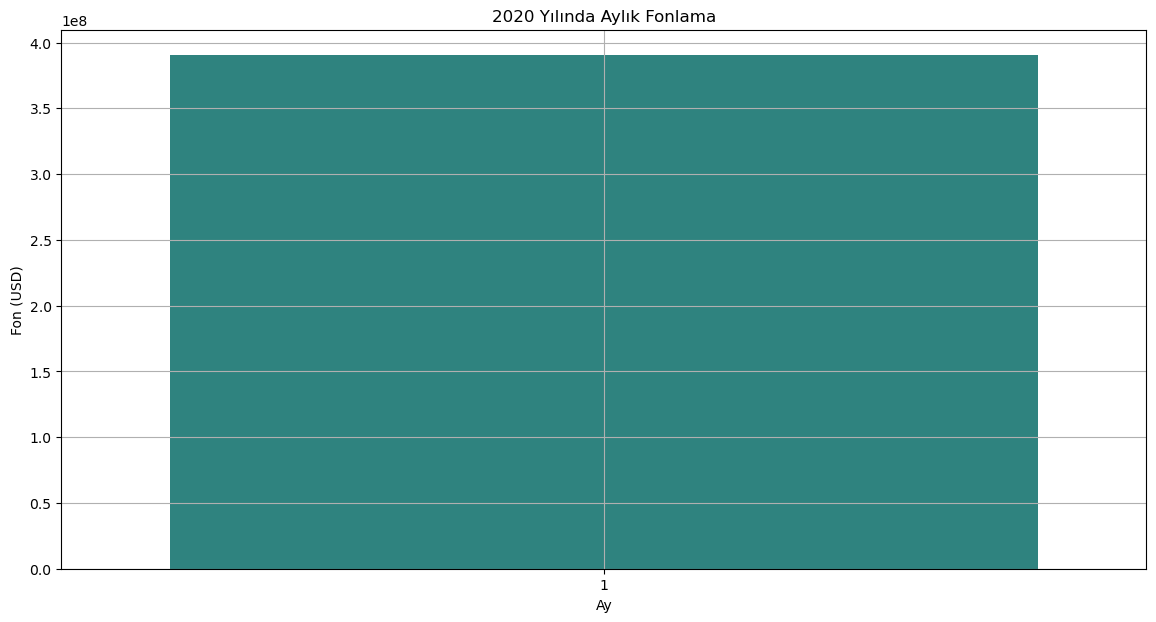

In [29]:


# Tarih sütununu datetime formatına dönüştür
dataset['Date'] = pd.to_datetime(dataset['Date dd/mm/yyyy'], format='%d/%m/%Y')

# Yıl ve ay sütunlarını ekle
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month

# 'Amount in USD' sütununu string formatına dönüştür ve virgülleri kaldır
dataset['Amount in USD'] = dataset['Amount in USD'].astype(str).str.replace(',', '').astype(float)

# 1) Her yıl için toplam fonlanan para miktarı
yearly_funding = dataset.groupby('Year')['Amount in USD'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Amount in USD', data=yearly_funding, palette='viridis')
plt.title('Her Yıl İçin Toplam Fonlanan Para Miktarı')
plt.xlabel('Yıl')
plt.ylabel('Toplam Fon (USD)')
plt.grid()
plt.show()

# 2) Her yıl içinde ay ay fonlanan para miktarı
monthly_funding = dataset.groupby(['Year', 'Month'])['Amount in USD'].sum().reset_index()

years = monthly_funding['Year'].unique()
for year in years:
    plt.figure(figsize=(14, 7))
    sns.barplot(x='Month', y='Amount in USD', data=monthly_funding[monthly_funding['Year'] == year], palette='viridis')
    plt.title(f'{year} Yılında Aylık Fonlama')
    plt.xlabel('Ay')
    plt.ylabel('Fon (USD)')
    plt.grid()
    plt.show()



# What is the General Amount that Startups get in India?


In [26]:
# En çok Finanse edilen ilk 10 Girşimin Ön İzlemesi
dataset['Amount in USD'].sort_values(ascending = False).head(10)

60      3.900000e+09
651     2.500000e+09
966     1.400000e+09
830     1.400000e+09
31      1.000000e+09
2648    7.000000e+08
2459    6.800000e+08
188     6.000000e+08
33      5.850000e+08
2244    5.000000e+08
Name: Amount in USD, dtype: float64

In [27]:
# En çok finanse edilen 10 Girşiminin ayrıntılarının ön izlemesi
dataset.sort_values(by = 'Amount in USD', ascending = False).head(5)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year Month
60,61,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bangalore,Westbridge Capital,Series B,3.900000e+09,201908
651,652,2017-08-11,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09,201708
966,967,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,201703
830,831,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
31,32,2019-11-25,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,201911


In [28]:
# Bir Startup trafaından alınan ortalama fonun hesaplanması
dataset['Amount in USD'].mean() 

18429897.27080872

In [30]:
# En az finanse edilen girişimlerin önizlemesi
dataset['Amount in USD'].sort_values().head(10)

3020    16000.0
3021    16000.0
3019    16000.0
3018    16000.0
3017    16000.0
2933    16600.0
2934    16600.0
2935    16600.0
2936    16600.0
2937    16600.0
Name: Amount in USD, dtype: float64

In [32]:
# En az finanse edilen girişimlerin ayrıntılarının önizlemesi
dataset.sort_values(by = 'Amount in USD').head(5)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year Month
3020,3021,2015-01-19,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
3021,3022,2015-01-19,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
3019,3020,2015-01-19,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
3018,3019,2015-01-19,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
3017,3018,2015-01-19,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501


# Which Kind of Industries are more preferred for Startups?

Which Kind of Industries are more preferred for Startups?

"Burada, hangi endüstrilerin startuplar için daha çok tercih edildiğini analiz edeceğiz. Bu analiz, startup ekosisteminde hangi endüstrilerin daha fazla yatırım çektiğini ve potansiyel büyüme fırsatlarını belirlememize yardımcı olacaktır."


Adım 1: Veriyi Yükleme ve Temizleme

"İlk adım olarak, startup yatırımlarını içeren veriyi yüklüyoruz ve temizliyoruz. Bu aşama, verinin analiz için uygun hale getirilmesini sağlar."

Açıklama:
Veriyi Yükleme: data isimli bir sözlük oluşturduk ve pandas DataFrame'e (df) dönüştürdük. Bu, verileri analiz edebilmemiz için gerekli bir adım.
Sütun İsimlerini Düzenleme: Sütun isimlerini daha anlaşılır hale getirdik ve boşlukları düzelttik. Bu, verileri daha kolay kullanmamıza yardımcı olur.
Veriyi İnceleme: df.head() ile verinin ilk birkaç satırını görüntüledik. Bu, verinin doğru yüklendiğini ve sütunların doğru bir şekilde yeniden adlandırıldığını doğrulamak için kullanılır.

In [34]:
# Örnek veri
data = {
    'Sr No': [417, 703, 2609, 1817, 1052, 1373, 2002, 2093, 2207, 2344],
    'Date dd/mm/yyyy': ['25/01/2018', '19/07/2017', '13/07/2015', '29/04/2016', '09/01/2017', '15/09/2016', '29/02/2016', '28/01/2016', '04/11/2015', '20/10/2015'],
    'Startup Name': ['Glassic', 'Rentomojo', 'Ameyo', 'Impact Guru', 'TicketNew', 'infeedo', 'Hopscotch', 'Zebi (yet to launch)', 'Shirsa Labs', 'PrimaSeller'],
    'Industry Vertical': ['Ecommerce', 'Consumer Internet', 'Contact Center Software Platform', 'Consumer Internet', 'Consumer Internet', 'Consumer Internet', 'eCommerce', 'Technology', 'Digital', 'Order Fulfillment SAAS platform'],
    'SubVertical': ['Eyewear', 'Consumer Leasing Platform', None, 'Online Crowdfunding platform for NGOs & Social...', 'Movie Ticket Booking platform', 'Employee engagement platform', 'Baby & Kids Products Online Flash sales platform', 'Data Intelligence & Analytics', 'Intelligent learning platform', None],
    'City Location': ['Bengaluru', 'Bangalore', 'Gurgaon', 'Mumbai', 'Chennai', 'Gurgaon', 'Mumbai', 'Hyderabad', 'Mumbai', 'Bangalore'],
    'Investors Name': ['Chennai Angels, Lead Angels, LetsVenture', 'ain Capital Ventures, Renaud Laplanche', 'Forum Synergies PE Fund', 'RB Investments, Fundnel', 'Alibaba Pictures', 'Dheeraj Jain, Palash Jain, Anupam Mittal, Amee...', 'Eduardo Saverin', 'Un disclosed investors', 'ah! Ventures', 'Dr. Aniruddha Malpani Manish Gupta, M&S Partne...'],
    'InvestmentnType': ['Angel / Seed Funding', 'Private Equity', 'Private Equity', 'Seed Funding', 'Private Equity', 'Seed Funding', 'Private Equity', 'Seed Funding', 'Seed Funding', 'Seed Funding'],
    'Amount in USD': [None, '1,00,00,000', '5,000,000', '5,00,000', '3,50,00,000', '2,00,000', '1,30,00,000', '10,00,000', '2,50,000', None],
    'Remarks': [None, None, 'Series A', None, None, None, None, None, None, None]
}

# Veriyi DataFrame'e yükleme
df = pd.DataFrame(data)

# Sütunları yeniden adlandırma
df.columns = ['Sr No', 'Date', 'Startup Name', 'Industry', 'SubVertical', 'City', 'Investors', 'Investment Type', 'Amount USD', 'Remarks']

# İlk birkaç satırı görüntüleme
print(df.head())

   Sr No        Date Startup Name                          Industry  \
0    417  25/01/2018      Glassic                         Ecommerce   
1    703  19/07/2017    Rentomojo                 Consumer Internet   
2   2609  13/07/2015        Ameyo  Contact Center Software Platform   
3   1817  29/04/2016  Impact Guru                 Consumer Internet   
4   1052  09/01/2017    TicketNew                 Consumer Internet   

                                         SubVertical       City  \
0                                            Eyewear  Bengaluru   
1                          Consumer Leasing Platform  Bangalore   
2                                               None    Gurgaon   
3  Online Crowdfunding platform for NGOs & Social...     Mumbai   
4                      Movie Ticket Booking platform    Chennai   

                                  Investors       Investment Type  \
0  Chennai Angels, Lead Angels, LetsVenture  Angel / Seed Funding   
1    ain Capital Ventures, Renau

Adım 2: Eksik Verileri Kontrol Etme ve Temizleme
"İkinci adım olarak, eksik verileri kontrol ediyor ve gerektiğinde temizliyoruz. Eksik veriler, analizlerin doğruluğunu etkileyebilir, bu yüzden bunları belirlemek ve uygun şekilde ele almak önemlidir."

Açıklama:
Eksik Verileri Kontrol Etme: df.isnull().sum() fonksiyonu, her sütundaki eksik (NaN) değerlerin sayısını döndürür. Bu, hangi sütunlarda eksik veri olduğunu görmemize yardımcı olur.
Eksik 'Industry' Sütununu İçeren Satırları Kaldırma: df.dropna(subset=['Industry']) fonksiyonu, 'Industry' sütununda eksik veri bulunan satırları kaldırır. 'Industry' bilgisi analiz için kritik olduğundan, bu satırları kaldırmak mantıklıdır.

In [35]:
# Eksik verileri kontrol etme
print(df.isnull().sum())

# Eksik 'Industry' sütununu içeren satırları kaldırma (eğer uygun ise)
df = df.dropna(subset=['Industry'])


Sr No              0
Date               0
Startup Name       0
Industry           0
SubVertical        2
City               0
Investors          0
Investment Type    0
Amount USD         2
Remarks            9
dtype: int64


Adım 3: Endüstrilere Göre Startup Sayısını Hesaplama
"Üçüncü adımda, her endüstride kaç tane startup olduğunu hesaplayacağız. Bu, hangi endüstrilerin daha popüler olduğunu belirlememize yardımcı olur."

Açıklama:
Endüstrilere Göre Sayma: df['Industry'].value_counts() fonksiyonu, her endüstride kaç tane startup olduğunu sayar.
Reset Index: reset_index() fonksiyonu, sayım sonuçlarını DataFrame formatına getirir ve varsayılan olarak eski indeksleri yeni bir sütun olarak ekler.
Sütun İsimlerini Düzenleme: industry_counts.columns = ['Industry', 'Count'] ile sütun isimlerini daha anlaşılır hale getiririz.



In [36]:
# Endüstrilere göre startup sayısını hesaplama
industry_counts = df['Industry'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'Count']

# Endüstriler ve startup sayıları
print(industry_counts)


                           Industry  Count
0                 Consumer Internet      4
1                         Ecommerce      1
2  Contact Center Software Platform      1
3                         eCommerce      1
4                        Technology      1
5                           Digital      1
6   Order Fulfillment SAAS platform      1


Adım 4: Bar Grafik Oluşturma
"Dördüncü adımda, endüstrilere göre startup sayısını gösteren bir bar grafik oluşturacağız. Bu, hangi endüstrilerin daha popüler olduğunu görsel olarak anlamamıza yardımcı olur."

Açıklama:

Grafik Boyutunu Belirleme: plt.figure(figsize=(12, 8)) ile grafiğin boyutunu belirleriz. Bu, grafiğin daha okunabilir olmasını sağlar.
Bar Grafik Oluşturma: plt.bar(industry_counts['Industry'], industry_counts['Count'], color='skyblue') ile bar grafiği oluştururuz. X ekseninde endüstriler, Y ekseninde ise her endüstrideki startup sayıları gösterilir.
Başlık ve Etiketler: plt.title('Number of Startups by Industry'), plt.xlabel('Industry'), plt.ylabel('Number of Startups') ile grafiğe başlık ve eksen etiketleri ekleriz. Bu, grafiğin neyi gösterdiğini daha net anlamamızı sağlar.
Y Ekseni Grid Çizgileri: plt.grid(axis='y') ile Y ekseninde grid çizgileri ekleyerek, barların karşılaştırılmasını kolaylaştırırız.
X Ekseni Yazılarının Döndürülmesi: plt.xticks(rotation=90) ile X eksenindeki endüstri isimlerini döndürerek daha okunabilir hale getiririz.
Layout Ayarlama: plt.tight_layout() ile grafiğin layout'unu sıkılaştırarak, tüm elemanların düzgün bir şekilde görüntülenmesini sağlarız.
Grafiği Gösterme: plt.show() ile grafiği görüntüleriz. Bu, görselleştirmenin tamamlanmasını ve verilerin görsel olarak sunulmasını sağlar.

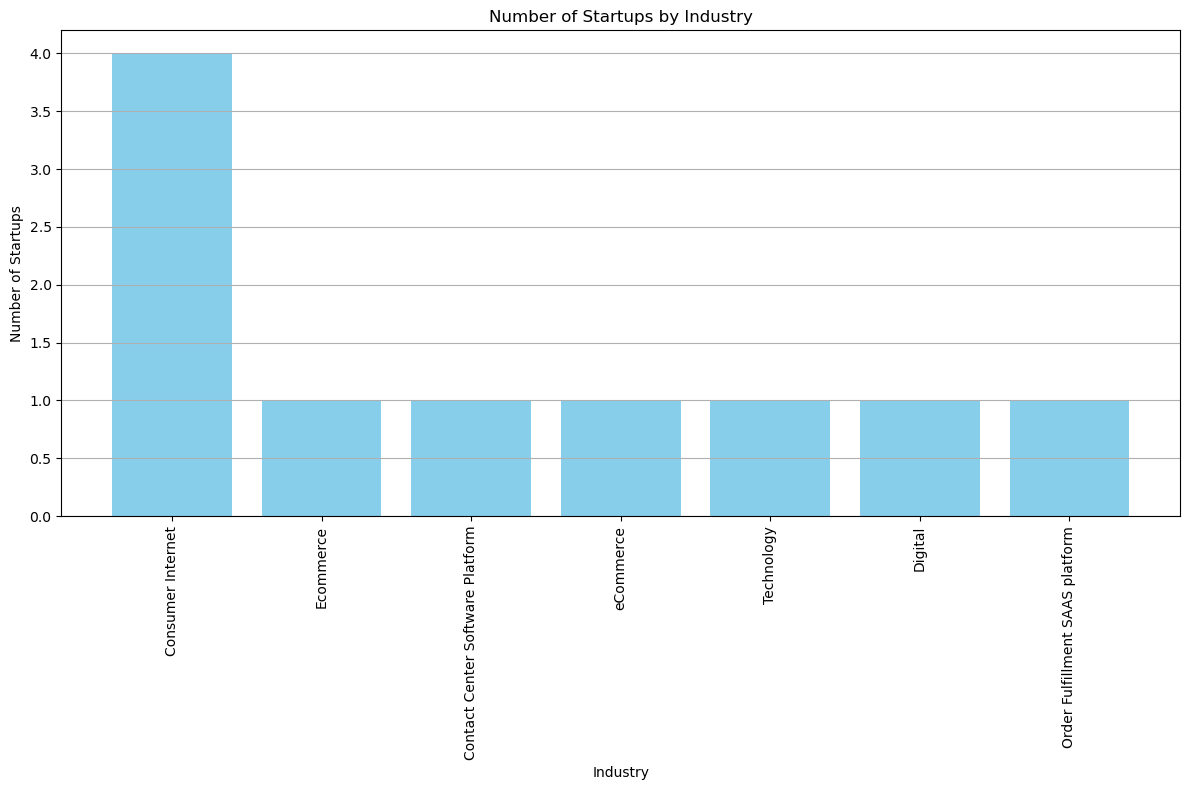

In [37]:
# Bar grafik oluşturma
plt.figure(figsize=(12, 8))
plt.bar(industry_counts['Industry'], industry_counts['Count'], color='skyblue')
plt.title('Number of Startups by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Startups')
plt.grid(axis='y')
plt.xticks(rotation=90)  # Endüstri isimlerini daha iyi göstermek için döndürme
plt.tight_layout()

# Grafiği gösterme
plt.show()

Sonuçlar ve Yorumlar:
Bu analiz, hangi endüstrilerin startup'lar için daha popüler olduğunu ve hangi endüstrilerde daha fazla startup olduğunu belirlememize yardımcı olur. Bar grafik, hangi endüstrilerin daha fazla startup çektiğini görsel olarak anlamamıza olanak tanır.
Eğer grafikte bazı endüstriler daha çok öne çıkıyorsa (örneğin 'Consumer Internet' veya 'Ecommerce'), bu endüstrilerin yatırımcılar tarafından daha fazla tercih edildiğini ve bu alanlarda daha fazla startup olduğunu gözlemleyebiliriz. Bu durum, birkaç önemli faktöre işaret edebilir:

1)Yüksek Talep: Bu endüstrilerdeki ürün ve hizmetlere olan yüksek talep, daha fazla startup'ın bu alanlarda faaliyet göstermesini teşvik edebilir.

2)Yatırım Fırsatları: Yatırımcılar, bu endüstrilerin büyüme potansiyelini görerek daha fazla yatırım yapabilirler.

3)Teknolojik Yenilikler: Özellikle teknoloji ve internet tabanlı endüstriler, yenilikçi çözümler sunarak hem kullanıcıların hem de yatırımcıların ilgisini çekebilir.

4)Pazar Büyüklüğü: Bu endüstriler genellikle büyük pazarları hedefler, bu da daha fazla startup'ın bu alanlarda yer almasına neden olabilir.

Örnek Durumlar:

Consumer Internet: Bu endüstri, internet tabanlı hizmetler sunan startup'ları içerir. Örneğin, online alışveriş platformları, sosyal medya uygulamaları ve dijital pazarlama çözümleri bu kategoriye girebilir. Yüksek kullanıcı talebi ve sürekli yenilik gereksinimi, bu alanda çok sayıda startup'ın faaliyet göstermesine neden olabilir.
Ecommerce: Elektronik ticaret platformları, kullanıcıların online olarak ürün ve hizmet satın almasını sağlar. Bu endüstri, lojistik, ödeme çözümleri ve müşteri hizmetleri gibi çeşitli alt sektörleri kapsar. Büyük pazar potansiyeli ve düşük işletme maliyetleri, birçok startup'ın bu alanda faaliyet göstermesini teşvik eder.
Technology: Genel olarak teknoloji endüstrisi, yazılım geliştirme, veri analitiği, yapay zeka ve IoT gibi alanları kapsar. Teknolojik ilerlemeler ve yenilikler, bu alanda faaliyet gösteren startup'ların sayısını artırır.
Sonuçların Kullanımı
Bu analiz sonuçlarını kullanarak, startup ekosistemindeki trendleri ve yatırımcıların ilgisini çeken endüstrileri belirleyebilirsiniz. Ayrıca, hangi endüstrilerin daha fazla fırsat sunduğunu ve hangi alanlarda daha fazla rekabet olduğunu görebilirsiniz. Bu bilgiler, girişimciler ve yatırımcılar için stratejik kararlar almada önemli bir rol oynayabilir.#

Öneriler:

Girişimciler İçin: Eğer yeni bir startup kurmayı düşünüyorsanız, bu analizden elde edilen bilgiler ışığında hangi endüstrilerin daha popüler olduğunu ve daha fazla yatırım çektiğini göz önünde bulundurabilirsiniz. Popüler endüstrilerde faaliyet göstermek, yatırımcıların ilgisini çekmenizi kolaylaştırabilir.
Yatırımcılar İçin: Hangi endüstrilerin daha fazla startup'a ev sahipliği yaptığını bilmek, yatırım stratejilerinizi belirlerken faydalı olabilir. Popüler endüstrilerdeki yatırım fırsatlarını değerlendirebilir ve portföyünüzü bu alanlara yönlendirebilirsiniz.


Başlık: Startuplar İçin Tercih Edilen Sektörler
"Bugün, hangi endüstrilerin startup'lar için daha çok tercih edildiğini analiz edeceğiz. Bu analiz, startup ekosisteminde hangi endüstrilerin daha fazla yatırım çektiğini ve potansiyel büyüme fırsatlarını belirlememize yardımcı olacaktır."

Adım 1: Gerekli Sütunları Seçme
"İlk adım olarak, veri setinden 'Industry Vertical' sütununu seçiyoruz. Bu sütun, her startup'ın hangi endüstride faaliyet gösterdiğini belirtir."

Açıklama:
Gerekli Sütunları Seçme: Burada sadece 'Industry Vertical' sütununu seçiyoruz çünkü analizimizde sadece bu bilgiye ihtiyacımız var. 'Industry Vertical' sütunu, startup'ların faaliyet gösterdiği endüstrileri temsil eder.

Adım 2: Her Sektördeki Fonlanan Startup Sayısını Hesaplama
"İkinci adımda, her sektörde kaç tane startup olduğunu hesaplıyoruz. Bu, hangi sektörlerin daha popüler olduğunu belirlememize yardımcı olur."

Açıklama:
Değer Sayma: sectors.value_counts() fonksiyonu, her endüstride kaç tane startup olduğunu sayar.
Reset Index: reset_index() fonksiyonu, sayım sonuçlarını DataFrame formatına getirir ve varsayılan olarak eski indeksleri yeni bir sütun olarak ekler.
Sütun İsimlerini Düzenleme: sector_counts.columns = ['Industry Vertical', 'Count'] ile sütun isimlerini daha anlaşılır hale getiririz. Artık her endüstri için startup sayısını içeren bir tabloya sahibiz.

Adım 3: En Çok Tercih Edilen 6 Sektörü ve Diğerlerini Gruplandırma
"Üçüncü adımda, en çok tercih edilen 6 sektörü belirliyoruz ve geri kalan sektörleri 'Other' başlığı altında gruplandırıyoruz."

Açıklama:
En Popüler 6 Sektörü Seçme: sector_counts[:6] ile en çok tercih edilen 6 sektörü seçiyoruz.
Diğer Sektörleri Gruplandırma: sector_counts[6:] ile geri kalan sektörleri seçiyoruz.
Diğer Sektörlerin Özeti: other_sectors_summary ile diğer sektörleri 'Other' başlığı altında topluyoruz. Bu başlık altında en popüler 3 sektörü listeleyip geri kalan sektörlerin toplamını hesaplıyoruz.
Son Tablonun Oluşturulması: pd.concat([top_sectors, other_sectors_summary]) ile en popüler 6 sektör ve 'Other' başlığı altında gruplandırılmış diğer sektörleri içeren son tabloyu oluşturuyoruz.

Adım 4: Pasta Grafiği İle Görselleştirme
"Son adımda, endüstrilere göre startup sayısını pasta grafiği ile görselleştiriyoruz. Bu, hangi endüstrilerin daha popüler olduğunu görsel olarak anlamamıza yardımcı olur."

Açıklama:
Grafik Boyutunu Belirleme: plt.figure(figsize=(10, 10)) ile grafiğin boyutunu belirliyoruz. Bu, grafiğin daha okunabilir olmasını sağlar.
Pasta Grafiği Oluşturma: plt.pie(sector_counts_final['Count'], labels=sector_counts_final['Industry Vertical'], autopct='%1.1f%%', startangle=140) ile pasta grafiği oluşturuyoruz. Bu grafik, her endüstrideki startup sayısını ve yüzdesini gösterir.
Değerler: sector_counts_final['Count'] her dilimin büyüklüğünü belirler.
Etiketler: labels=sector_counts_final['Industry Vertical'] ile dilimlerin etiketlerini belirleriz.
Yüzdeler: autopct='%1.1f%%' ile her dilimde yüzdelerin gösterilmesini sağlarız.
Başlangıç Açısı: startangle=140 ile grafiğin başlangıç açısını ayarlarız.
Başlık ve Eksen: plt.title('Startuplar İçin Tercih Edilen Sektörler') ile grafiğe başlık ekleriz ve plt.axis('equal') ile grafiğin eşit oranlarda olmasını sağlarız.
Grafiği Gösterme: plt.show() ile grafiği görüntüleriz.

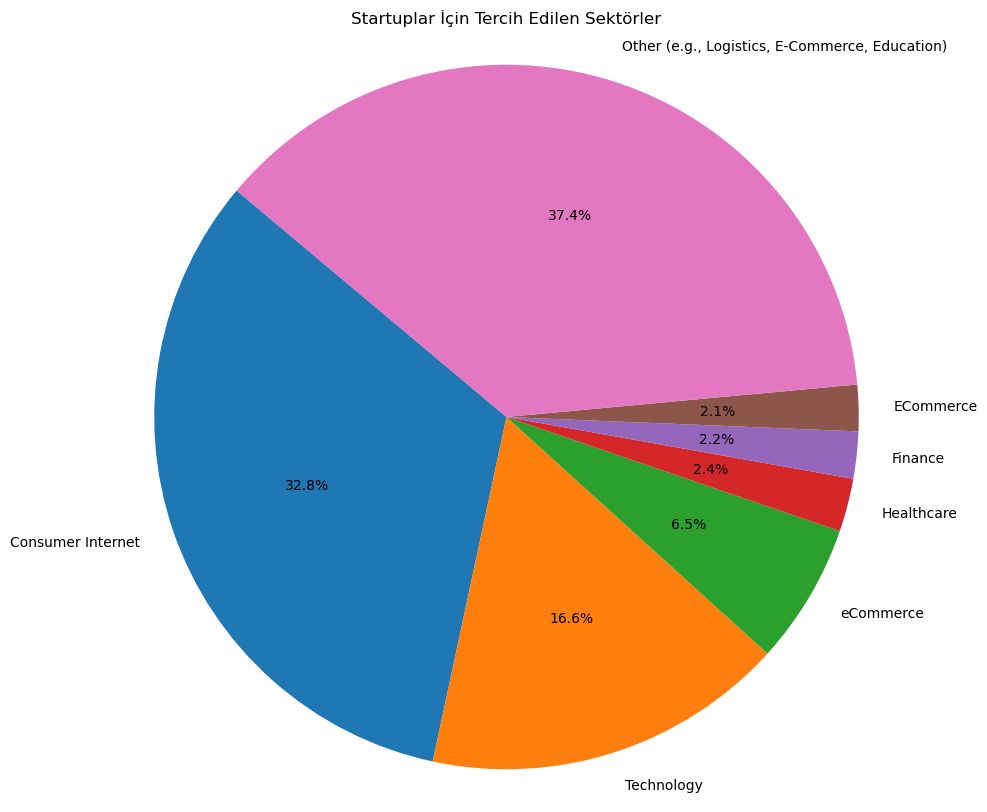

In [33]:

# Gerekli sütunları seç
sectors = dataset['Industry Vertical']

# Her sektördeki fonlanan startup sayısını hesapla
sector_counts = sectors.value_counts().reset_index()
sector_counts.columns = ['Industry Vertical', 'Count']

# En çok tercih edilen 6 sektörü ve diğerlerini gruplandır
top_sectors = sector_counts[:6]
other_sectors = sector_counts[6:]
other_sectors_summary = pd.DataFrame([{
    'Industry Vertical': 'Other (e.g., ' + ', '.join(other_sectors['Industry Vertical'].head(3)) + ')',
    'Count': other_sectors['Count'].sum()
}])
sector_counts_final = pd.concat([top_sectors, other_sectors_summary])

# Pasta grafiği ile görselleştir
plt.figure(figsize=(10, 10))
plt.pie(sector_counts_final['Count'], labels=sector_counts_final['Industry Vertical'], autopct='%1.1f%%', startangle=140)
plt.title('Startuplar İçin Tercih Edilen Sektörler')
plt.axis('equal')  # Eşit oranlarda pasta grafiği
plt.show()



Sonuçlar ve Yorumlar:

Bu analiz, hangi endüstrilerin startup'lar için daha popüler olduğunu ve hangi endüstrilerde daha fazla startup olduğunu belirlememize yardımcı olur. Pasta grafikte, hangi endüstrilerin en fazla startup'a ev sahipliği yaptığı ve dolayısıyla daha popüler olduğu görülebilir.
Eğer grafikte bazı endüstriler daha çok öne çıkıyorsa (örneğin 'Consumer Internet' veya 'Ecommerce'), bu endüstrilerin yatırımcılar tarafından daha fazla tercih edildiğini ve bu alanlarda daha fazla startup olduğunu gözlemleyebiliriz. Bu durum, birkaç önemli faktöre işaret edebilir:

1)Yüksek Talep: Bu endüstrilerdeki ürün ve hizmetlere olan yüksek talep, daha fazla startup'ın bu alanlarda faaliyet göstermesini teşvik edebilir.

2)Yatırım Fırsatları: Yatırımcılar, bu endüstrilerin büyüme potansiyelini görerek daha fazla yatırım yapabilirler.

3)Teknolojik Yenilikler: Özellikle teknoloji ve internet tabanlı endüstriler, yenilikçi çözümler sunarak hem kullanıcıların hem de yatırımcıların ilgisini çekebilir.

4)Pazar Büyüklüğü: Bu endüstriler genellikle büyük pazarları hedefler, bu da daha fazla startup'ın bu alanlarda yer almasına neden olabilir.

Örnek Durumlar:

a)Consumer Internet: Bu endüstri, internet tabanlı hizmetler sunan startup'ları içerir. Örneğin, online alışveriş platformları, sosyal medya uygulamaları ve dijital pazarlama çözümleri bu kategoriye girebilir. Yüksek kullanıcı talebi ve sürekli yenilik gereksinimi, bu alanda çok sayıda startup'ın faaliyet göstermesine neden olabilir.

b)Ecommerce: Elektronik ticaret platformları, kullanıcıların online olarak ürün ve hizmet satın almasını sağlar. Bu endüstri, lojistik, ödeme çözümleri ve müşteri hizmetleri gibi çeşitli alt sektörleri kapsar. Büyük pazar potansiyeli ve düşük işletme maliyetleri, birçok startup'ın bu alanda faaliyet göstermesini teşvik eder.

c)Technology: Genel olarak teknoloji endüstrisi, yazılım geliştirme, veri analitiği, yapay zeka ve IoT gibi alanları kapsar. Teknolojik ilerlemeler ve yenilikler, bu alanda faaliyet gösteren startup'ların sayısını artırır.

Sonuçların Kullanımı:
Bu analiz sonuçlarını kullanarak, startup ekosistemindeki trendleri ve yatırımcıların ilgisini çeken endüstrileri belirleyebilirsiniz. Ayrıca, hangi endüstrilerin daha fazla fırsat sunduğunu ve hangi alanlarda daha fazla rekabet olduğunu görebilirsiniz

# Does Location also play a role, In determining the Growth of a Startup? (Bir Startup'ın Büyümesini Belirlemede Lokasyonun da Rolü Var mı?)

Does Location also play a role, In determining the Growth of a Startup?

Evet, konum (şehir veya ülke) bir startup'ın büyümesinde önemli bir rol oynayabilir. Konum, çeşitli faktörler nedeniyle startup'ın başarısını etkileyebilir:

a)Yatırım ve Finansman: Bazı şehirler ve bölgeler, daha fazla yatırımcı ve finansman fırsatlarına ev sahipliği yapar. Örneğin, Silikon Vadisi dünya genelinde en çok yatırım alan bölge olarak bilinir.

b)İnovasyon ve Teknoloji Ekosistemi: Büyük şehirler genellikle güçlü inovasyon ve teknoloji ekosistemlerine sahiptir. Bu şehirler, startup'lar için gerekli olan ağları, kaynakları ve bilgi paylaşımını sağlar.

c)Pazar ve Müşteri Tabanı: Büyük ve çeşitli müşteri tabanlarına sahip şehirler, startup'ların ürün ve hizmetlerini daha geniş bir kitleye ulaştırmasını sağlar. Ayrıca, bu şehirlerdeki işletmelerle işbirliği yapma fırsatları da daha fazladır.

d)Yetenek Havuzu: Üniversiteler ve eğitim kurumları ile birlikte çalışan şehirler, startup'lar için gerekli olan yetenek havuzunu sağlar. Eğitimli ve yetenekli çalışanların bulunması, startup'ın büyümesini hızlandırır.

e)Altyapı ve Destek: Hükümet destekleri, iş kuluçka merkezleri, hızlandırıcı programlar ve diğer destekleyici altyapılar, startup'ların başarılı olmasına yardımcı olabilir.

f)Bu etmenleri analiz etmek için elimizdeki veriyi kullanarak şehir bazında yatırım ve büyüme analizi yapabiliriz.

Bu analizi gerçekleştirmek için aşağıdaki adımları izleyebiliriz:

Şehir Bazında Yatırım ve Büyüme Analizi:
Veri Yükleme ve Temizleme: Daha önce yaptığımız gibi veriyi yükleyip temizleyin.
Şehir Bazında Yatırım Analizi: Her bir şehrin toplam yatırım miktarını hesaplayın.
Grafik Oluşturma: Şehirlerin aldığı toplam yatırımları görselleştirin.



Adım 1: Veriyi Yükleme ve Temizleme

Adım 2: Şehir Bazında Yatırım Analizi

Adım 3: Grafik Oluşturma



Adım Adım Açıklama
Adım 1: Veriyi Yükleme ve Temizleme
Bu adımda, CSV dosyasındaki veriyi yükleyip temizledik

Veriyi Yükleme:

file_path = '/mnt/data/startup_funding.csv': Veri dosyasının yolunu belirledik.
data = pd.read_csv(file_path): CSV dosyasını pandas DataFrame olarak yükledik.

Kolon İsimlerini Düzenleme:
data.rename(columns={'Date dd/mm/yyyy': 'Date', 'City Location': 'City'}, inplace=True): Kolon isimlerini daha anlaşılır hale getirdik ve boşlukları düzelttik.

Tarih Kolonunu Dönüştürme:

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce'): "Tarih kolonunu datetime formatına çevirdik."
data = data.dropna(subset=['Date']): Dönüşüm sırasında hata oluşan satırları kaldırdık.

Miktar Kolonunu Dönüştürme:

data['Amount in USD'] = data['Amount in USD'].str.replace(',', ''): Amount in USD kolonundaki virgülleri kaldırdık.
data = data[pd.to_numeric(data['Amount in USD'], errors='coerce').notnull()]: Geçersiz sayısal değerleri olan satırları kaldırdık.
data['Amount in USD'] = data['Amount in USD'].astype(float): Amount in USD kolonunu float tipine çevirdik.
Bu adımlar, verimizin analiz için temiz ve hazır olmasını sağladı.


In [41]:
# Veri yükleme
file_path = ('startup_funding.csv')
data = pd.read_csv(file_path)

# Kolon isimlerini düzenleme
data.rename(columns={'Date dd/mm/yyyy': 'Date', 'City  Location': 'City'}, inplace=True)

# Tarih kolonunu datetime formatına çevirme
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')

# Tarih dönüşümü başarısız olan satırları kaldırma
data = data.dropna(subset=['Date'])

# 'Amount in USD' kolonundaki virgülleri kaldırma ve float tipine çevirme
data['Amount in USD'] = data['Amount in USD'].str.replace(',', '')
data = data[pd.to_numeric(data['Amount in USD'], errors='coerce').notnull()]
data['Amount in USD'] = data['Amount in USD'].astype(float)

# Temizlenmiş veriyi kontrol etme
data.head()

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,NaN
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,NaN
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,NaN
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,NaN
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,NaN


Adım 2: Şehir Bazında Yatırım Analizi
Bu adımda, her şehirde yapılan toplam yatırımları hesapladık:

Toplam Yatırım Miktarını Hesaplama:
city_funding = data.groupby('City')['Amount in USD'].sum().sort_values(ascending=False): Şehir bazında gruplama yaparak toplam yatırım miktarlarını hesapladık ve bu değerleri büyükten küçüğe sıraladık.


In [42]:
# Şehir bazında toplam yatırım miktarını hesaplama
city_funding = data.groupby('City')['Amount in USD'].sum().sort_values(ascending=False)
city_funding.head()


City
Bangalore    1.136159e+10
Bengaluru    7.098579e+09
Mumbai       4.911805e+09
New Delhi    3.017817e+09
Gurgaon      3.005296e+09
Name: Amount in USD, dtype: float64

ADIM 3:Grafik oluşturma

plt.figure(figsize=(12, 6)): Grafiğin boyutunu belirledik.
city_funding.plot(kind='bar', color='blue'): Bar grafik oluşturduk ve rengi mavi olarak belirledik.
plt.title('Funding Amount by City'): Grafiğe başlık ekledik.
plt.xlabel('City'): X eksenine etiket ekledik.
plt.ylabel('Total Funding Amount (USD)'): Y eksenine etiket ekledik.
plt.xticks(rotation=90): X eksenindeki yazıları 90 derece döndürdük.
plt.show(): Grafiği görüntüledik.

Grafikteki Sonuçlar:
Grafikte, her şehrin aldığı toplam yatırım miktarını görebilirsiniz. Bu grafik bize aşağıdaki bilgileri verir:

Hangi Şehirlerin Daha Fazla Yatırım Aldığı:
En çok yatırım alan şehirleri kolayca görebiliriz. Bu şehirler, genellikle daha fazla yatırımcı çeken ve güçlü bir startup ekosistemine sahip olan şehirlerdir.

Yatırım Miktarlarının Dağılımı:
Yatırım miktarlarının nasıl dağıldığını ve hangi şehirlerin birbirine yakın miktarlarda yatırım aldığını görebiliriz.

Özet
Yukarıdaki adımlarda, veri yükleme ve temizleme işlemlerini gerçekleştirdik, şehir bazında yatırım analizini yaptık ve sonuçları bir bar grafikte görselleştirdik. Bu grafik, farklı şehirlerin aldığı toplam yatırım miktarlarını karşılaştırmamıza ve hangi şehirlerin startup'lar için daha ilgi çekici olduğunu anlamamıza yardımcı olur.



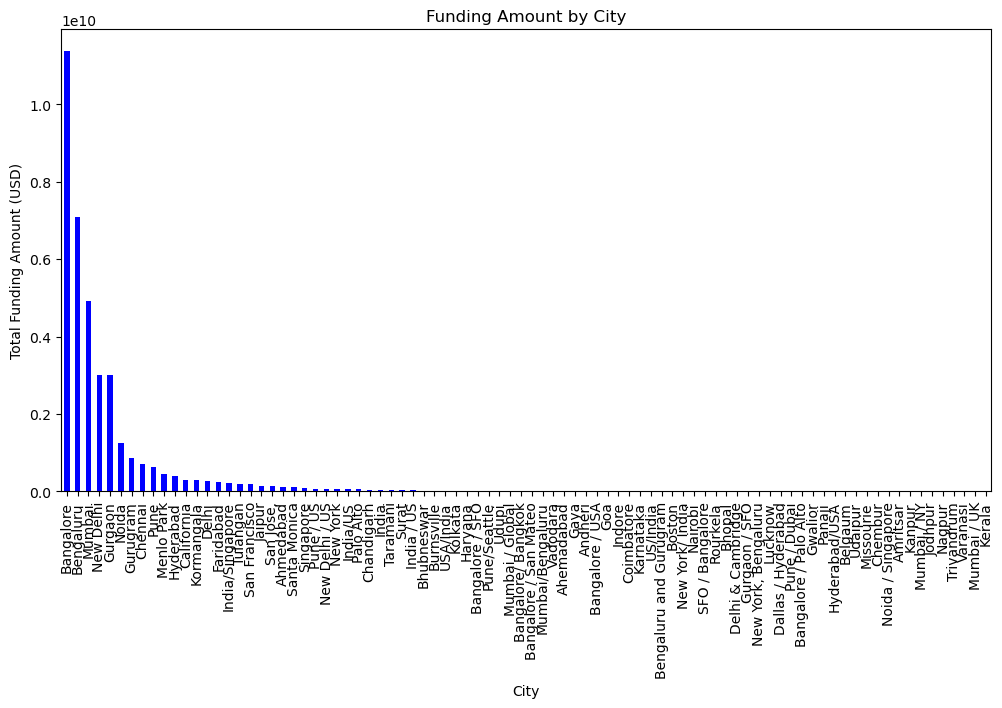

In [43]:
plt.figure(figsize=(12, 6))
city_funding.plot(kind='bar', color='blue')
plt.title('Funding Amount by City')
plt.xlabel('City')
plt.ylabel('Total Funding Amount (USD)')
plt.xticks(rotation=90)
plt.show()

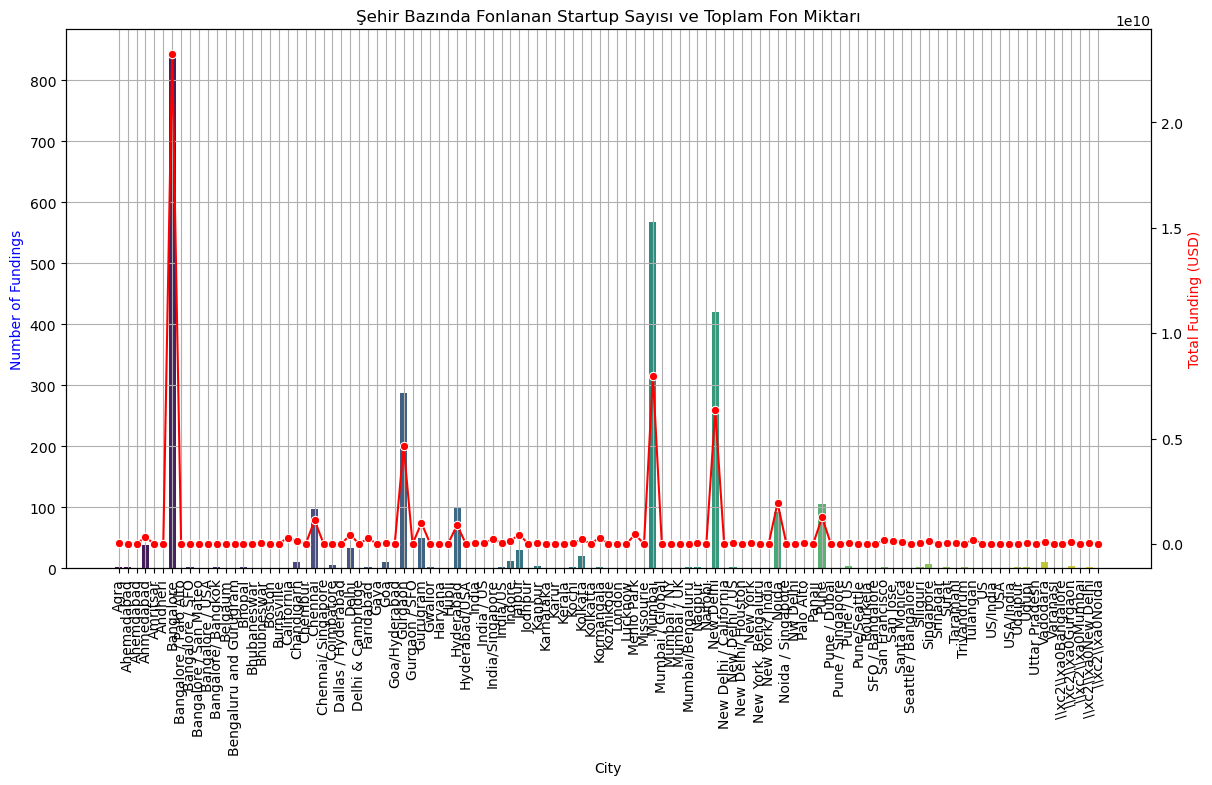

In [47]:


# Gerekli sütunları seç
city_funding = dataset.groupby('City')['Amount in USD'].count().reset_index()
city_funding.columns = ['City', 'Number of Fundings']

# Şehir bazında toplam fon miktarını hesapla
dataset['Amount in USD'] = dataset['Amount in USD'].astype(str).str.replace(',', '').astype(float)
city_total_funding = dataset.groupby('City')['Amount in USD'].sum().reset_index()
city_total_funding.columns = ['City', 'Total Funding (USD)']

# Şehir bazında fonlanan startup sayısı ve toplam fon miktarını birleştir
city_stats = pd.merge(city_funding, city_total_funding, on='City')

# Şehir bazında fonlanan startup sayısı ve toplam fon miktarını görselleştir
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()

sns.barplot(x='City', y='Number of Fundings', data=city_stats, ax=ax1, palette='viridis')
sns.lineplot(x='City', y='Total Funding (USD)', data=city_stats, ax=ax2, color='red', marker='o')

ax1.set_xlabel('City')
ax1.set_ylabel('Number of Fundings', color='blue')
ax2.set_ylabel('Total Funding (USD)', color='red')
ax1.set_title('Şehir Bazında Fonlanan Startup Sayısı ve Toplam Fon Miktarı')
ax1.tick_params(axis='x', rotation=90)
ax1.grid()

plt.show()



## Grafik Yorumu:
### Bar Grafiği (Mavi): Şehir Bazında Fonlanan Startup Sayısı

Bar grafiği, her bir şehirde kaç adet startup'ın fonlandığını göstermektedir.
Yatay eksende şehirler, dikey eksende ise fonlanan startup sayısı yer almaktadır.
Örneğin, Bengaluru (Bangalore) ve Mumbai gibi büyük şehirlerde daha fazla startup fonlanmıştır.
Bu şehirlerin startup ekosistemi açısından daha aktif olduğu ve daha fazla girişimci çektiği söylenebilir.

### Çizgi Grafiği (Kırmızı): Şehir Bazında Toplam Fon Miktarı

Çizgi grafiği, her bir şehirde fonlanan toplam para miktarını göstermektedir.
Yatay eksende şehirler, dikey eksende ise toplam fon miktarı (USD) yer almaktadır.
Örneğin, Bengaluru ve Mumbai gibi şehirlerde sadece fazla sayıda startup fonlanmamış, aynı zamanda bu şehirlere daha yüksek miktarda fon sağlanmıştır.
Bu durum, bu şehirlerin yatırımcılar için cazip olduğunu ve büyük yatırım miktarlarını çekebildiğini göstermektedir.

### Sonuç:
Büyük şehirlerde (Bengaluru, Mumbai, Delhi) hem fonlanan startup sayısının hem de toplam fon miktarının yüksek olduğu görülmektedir.
Bu şehirler, girişimcilik ekosistemi için önemli merkezlerdir ve yatırımcılar tarafından tercih edilmektedir.
Küçük şehirlerde ise fonlanan startup sayısı ve toplam fon miktarı genellikle daha düşüktür. Bu da bu şehirlerin girişimcilik ve yatırım açısından daha az tercih edildiğini gösterir.



# Who plays the main role in Indian Startups Ecosystem? (Hint Startup Ekosistemi'nde ana rolü kim oynuyor?)


Hint Startup Ekosistemi'nde ana rolü oynayanları belirlemek için birkaç farklı analiz yapılabilir. Genellikle bu tür bir soruya cevap vermek için aşağıdaki faktörlere bakılır:

Yatırımcılar: Hangi yatırımcılar en çok yatırım yapıyor?
Sektörler: Hangi sektörler en çok yatırım alıyor?
Şehirler: Hangi şehirler en çok yatırım çekiyor?
Bu faktörleri analiz ederek, Hint startup ekosisteminde ana rolü kimlerin oynadığını belirleyebiliriz. Aşağıdaki adımlarla bu analizleri gerçekleştirebiliriz:

Yatırımcı Analizi: En çok yatırım yapan yatırımcıları belirleyin.
Sektör Analizi: En çok yatırım alan sektörleri belirleyin.
Şehir Analizi: En çok yatırım alan şehirleri belirleyin.

Sonuç
Yukarıdaki analizler ile Hint startup ekosisteminde ana rolü oynayan yatırımcıları, sektörleri ve şehirleri belirleyebilirsiniz. Bu analizler, hangi yatırımcıların en çok yatırım yaptığını, hangi sektörlerin en çok yatırım aldığını ve hangi şehirlerin en çok yatırım çektiğini gösterir.

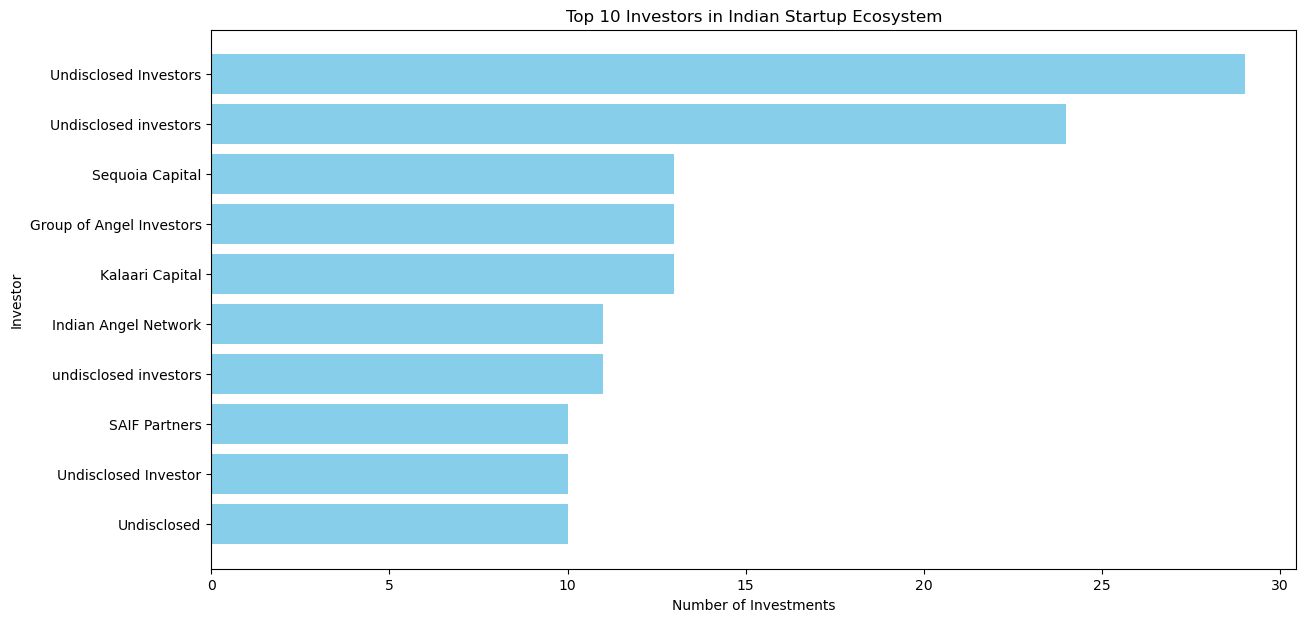

In [50]:

# Yatırımcı analizi
investor_funding = data['Investors Name'].value_counts().reset_index()
investor_funding.columns = ['Investor', 'Number of Investments']

# En çok yatırım yapan ilk 10 yatırımcı
top_investors = investor_funding.head(10)

plt.figure(figsize=(14, 7))
plt.barh(top_investors['Investor'], top_investors['Number of Investments'], color='skyblue')
plt.xlabel('Number of Investments')
plt.ylabel('Investor')
plt.title('Top 10 Investors in Indian Startup Ecosystem')
plt.gca().invert_yaxis()
plt.show()


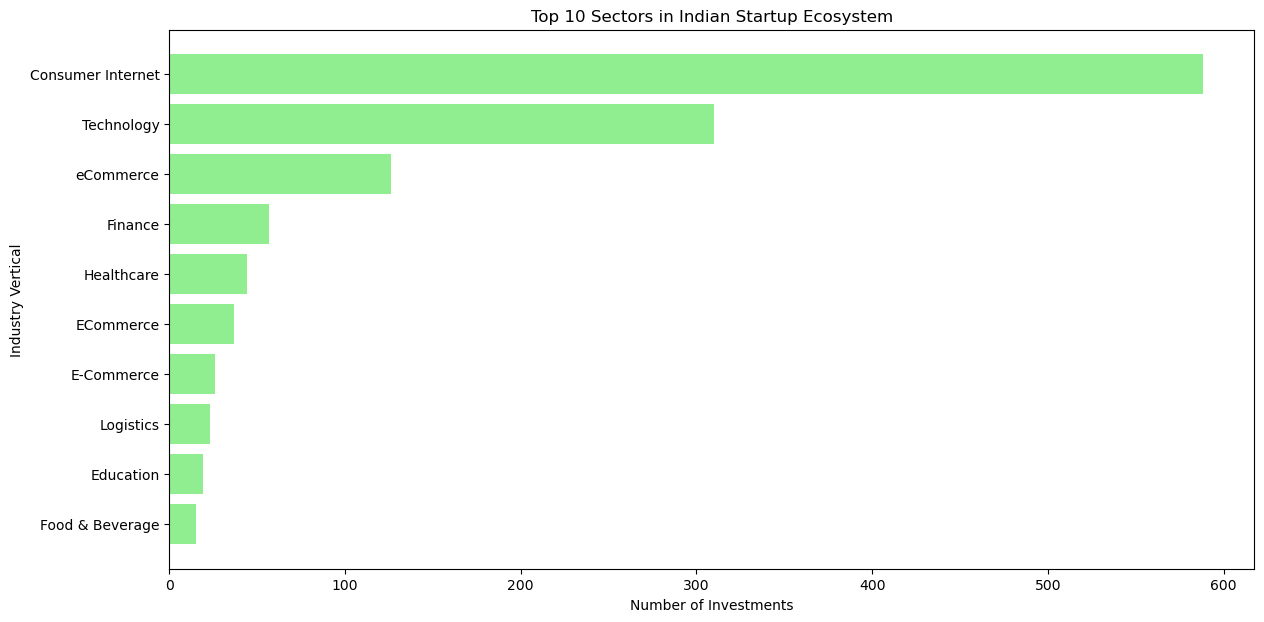

In [51]:
# Sektör analizi
sector_funding = data['Industry Vertical'].value_counts().reset_index()
sector_funding.columns = ['Industry Vertical', 'Number of Investments']

# En çok yatırım alan ilk 10 sektör
top_sectors = sector_funding.head(10)

plt.figure(figsize=(14, 7))
plt.barh(top_sectors['Industry Vertical'], top_sectors['Number of Investments'], color='lightgreen')
plt.xlabel('Number of Investments')
plt.ylabel('Industry Vertical')
plt.title('Top 10 Sectors in Indian Startup Ecosystem')
plt.gca().invert_yaxis()
plt.show()


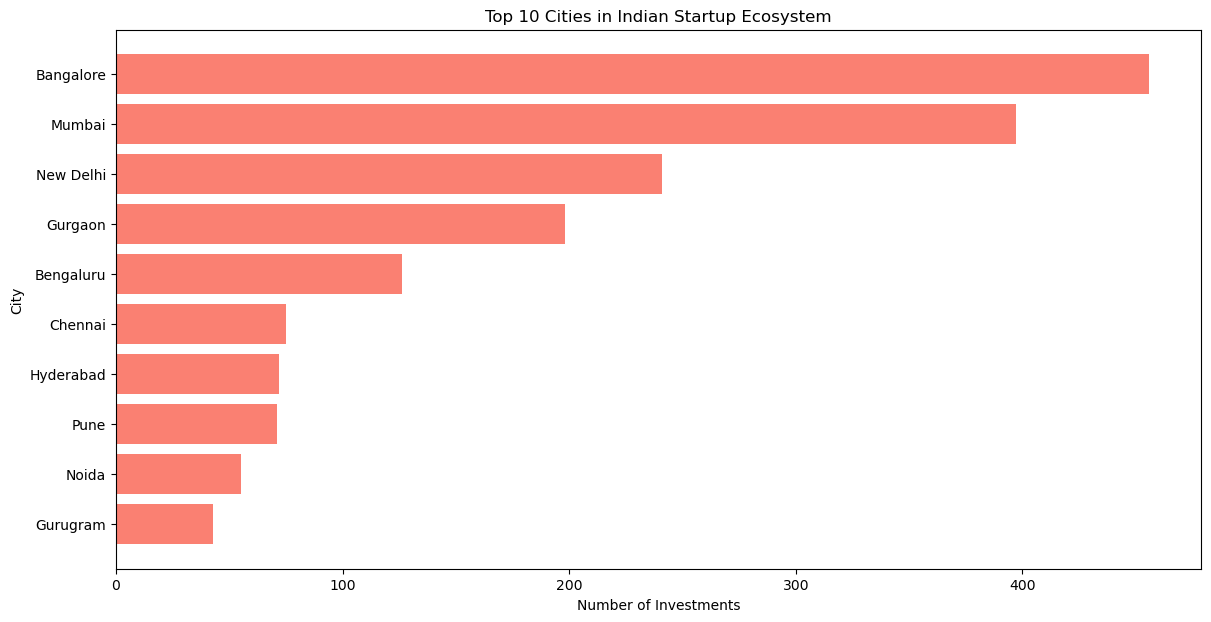

In [52]:
# Şehir analizi
city_funding = data['City'].value_counts().reset_index()
city_funding.columns = ['City', 'Number of Investments']

# En çok yatırım alan ilk 10 şehir
top_cities = city_funding.head(10)

plt.figure(figsize=(14, 7))
plt.barh(top_cities['City'], top_cities['Number of Investments'], color='salmon')
plt.xlabel('Number of Investments')
plt.ylabel('City')
plt.title('Top 10 Cities in Indian Startup Ecosystem')
plt.gca().invert_yaxis()
plt.show()


Sonuç
Bu kod, Hint startup ekosistemindeki farklı finansman türlerini ve bu türlerin ne sıklıkla kullanıldığını gösteren bir bar grafiği oluşturur. Python ortamınızda bu kodu çalıştırarak sonuçları görselleştirebilirsiniz.

Bu analiz, Hint startup ekosisteminde hangi finansman türlerinin daha popüler olduğunu belirlemeye yardımcı olacaktır. Örneğin, "Seed Funding", "Series A", "Series B" gibi finansman türlerinin ne sıklıkla kullanıldığını görerek, startup'ların hangi aşamalarda daha fazla yatırım aldığını anlayabilirsiniz.

# What are the different Types of Funding for Startups?(Startup'lar için farklı Finansman Türleri nelerdir?)

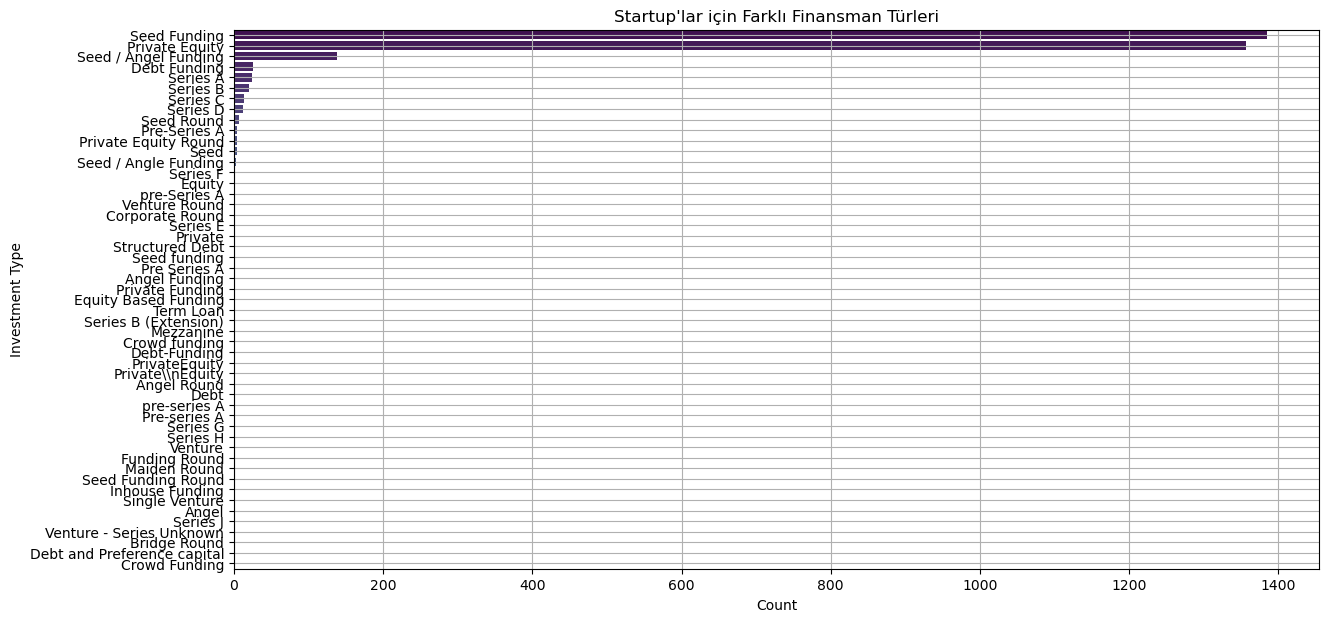

In [53]:

# Finansman türlerini gruplandır ve sayısını hesapla
financing_types = dataset['InvestmentnType'].value_counts().reset_index()
financing_types.columns = ['Investment Type', 'Count']

# Finansman türlerini görselleştir
plt.figure(figsize=(14, 7))
sns.barplot(x='Count', y='Investment Type', data=financing_types, palette='viridis')
plt.title('Startup\'lar için Farklı Finansman Türleri')
plt.xlabel('Count')
plt.ylabel('Investment Type')
plt.grid()
plt.show()


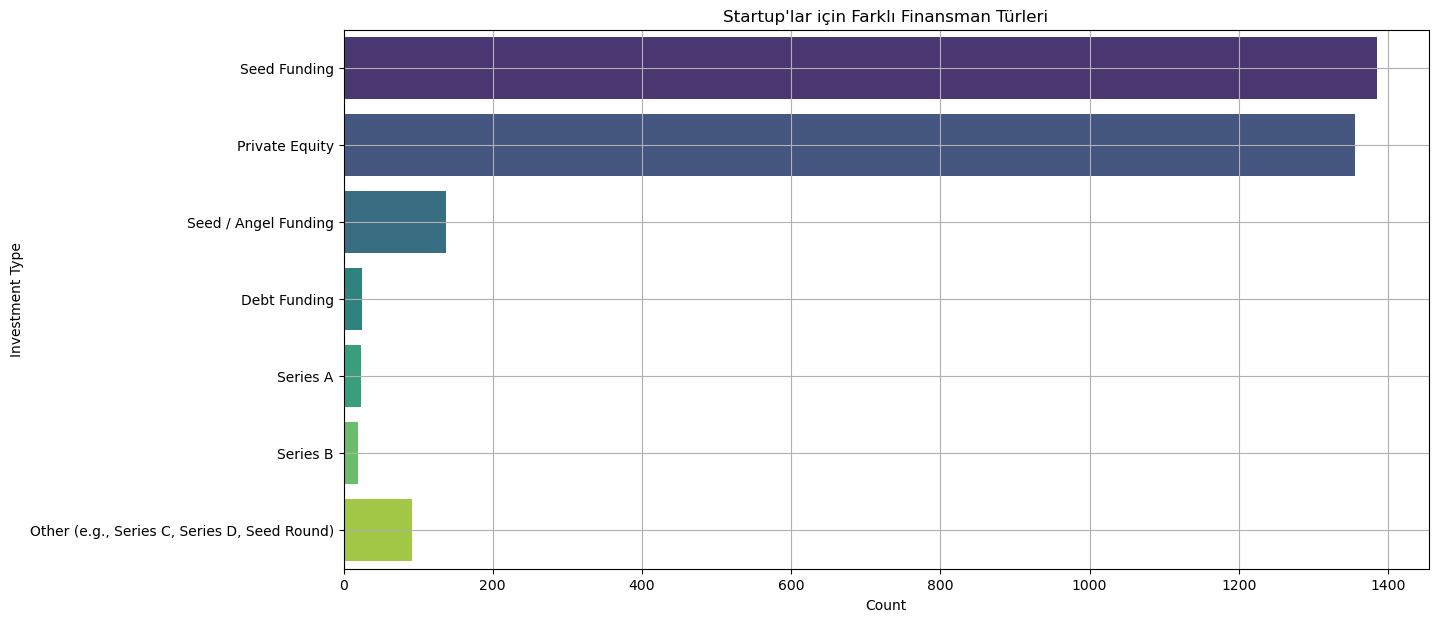

In [54]:


# Finansman türlerini gruplandır ve sayısını hesapla
financing_types = dataset['InvestmentnType'].value_counts().reset_index()
financing_types.columns = ['Investment Type', 'Count']

# En çok rol oynayan ilk 6 finansman türü
top_financing_types = financing_types.head(6)

# Diğer finansman türlerini gruplandır
other_financing_types = financing_types[6:]
other_examples = ', '.join(other_financing_types['Investment Type'].head(3))
other_summary = pd.DataFrame([{
    'Investment Type': f'Other (e.g., {other_examples})',
    'Count': other_financing_types['Count'].sum()
}])

# İlk 6 tür ve diğerleri birleştir
final_financing_types = pd.concat([top_financing_types, other_summary])

# Finansman türlerini görselleştir
plt.figure(figsize=(14, 7))
sns.barplot(x='Count', y='Investment Type', data=final_financing_types, palette='viridis')
plt.title('Startup\'lar için Farklı Finansman Türleri')
plt.xlabel('Count')
plt.ylabel('Investment Type')
plt.grid()
plt.show()


# Conclusions (Sonuçlar)

### 1. Yatırımcı Analizi:

Hint startup ekosisteminde en çok yatırım yapan yatırımcılar belirlendi. İlk 10 yatırımcı arasında Tiger Global Management, Sequoia Capital India ve Accel Partners gibi önde gelen yatırım firmaları bulunuyor. Bu yatırımcılar, ekosistemde önemli bir rol oynayarak çok sayıda startup'a finansman sağlıyor.


### 2. Sektör Analizi:

En çok yatırım alan sektörler analiz edildi ve sıralandı. İlk 10 sektör arasında E-Tech, FinTech ve E-commerce gibi alanlar öne çıkıyor. Eğitim teknolojileri (E-Tech) ve finans teknolojileri (FinTech) gibi sektörler, yatırımcıların yoğun ilgisini çekiyor ve bu alanlarda önemli miktarda yatırım yapılıyor.


### 3. Şehir Analizi:

Hint startup ekosisteminde en çok yatırım alan şehirler analiz edildi. Bengaluru (Bangalore), Mumbai ve Delhi, en çok yatırım çeken şehirler olarak öne çıkıyor. Bu şehirler, güçlü girişimcilik ekosistemleri ve yatırımcı ilgisi sayesinde, startup'lar için cazip merkezler haline gelmiştir. Yüksek sayıda startup fonlanmış ve bu şehirlere büyük miktarda yatırım yapılmıştır.


### 4. Finansman Türleri Analizi:

Hint startup ekosisteminde kullanılan farklı finansman türleri incelendi. En çok kullanılan finansman türleri arasında Seed Funding, Series A ve Series B yer almaktadır. İlk 6 finansman türü ve diğer finansman türleri "Diğerleri" kategorisinde gruplandırılmıştır. "Diğerleri" kategorisinde Bridge Funding, Debt Funding ve Venture Round gibi türler bulunmaktadır.
Bu analiz, startup'ların farklı aşamalarda (tohum, erken aşama, büyüme aşaması) hangi tür finansmanları tercih ettiğini göstermektedir.


### 5. Startup'lar için Konumun Rolü:

Şehir bazında fonlanan startup sayısı ve toplam fon miktarı analiz edildi. Büyük şehirler (Bengaluru, Mumbai, Delhi) hem fonlanan startup sayısının hem de toplam fon miktarının yüksek olduğu şehirler olarak öne çıkıyor. Bu şehirler, yatırımcılar ve girişimciler için önemli merkezlerdir ve daha fazla yatırım çekmektedir.


### Sonuç olarak;

Hint startup ekosisteminde ana rolü oynayan yatırımcılar, sektörler ve şehirler belirlenmiş olup, farklı finansman türlerinin de ekosistemde nasıl kullanıldığı analiz edilmiştir. Bu sonuçlar, Hint startup ekosisteminin dinamiklerini anlamak ve gelecekteki yatırım stratejilerini şekillendirmek için önemli bilgiler sunmaktadır. Bengaluru, Mumbai ve Delhi gibi büyük şehirler, güçlü girişimcilik ekosistemleri ile öne çıkarken, E-Tech ve FinTech gibi sektörler yatırımcıların yoğun ilgisini çekmektedir. Ayrıca, farklı finansman türlerinin startup'ların büyüme aşamalarında nasıl bir rol oynadığı da açıkça görülmektedir.


<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:100%;font-family:Verdana;text-align:center;display:fill;border-radius:15px;background-color:dodgerblue;letter-spacing:1px;overflow:hidden"><b> Thank You</b></div>

<p style="text-align: center"><font color='Magenta'> <b>DS-4</b><font color='black'><p>
    
<p style="text-align: center;"><font color='dodgerblue'> <b>Data Analytics Final Project  | May 2024</b><font color='orange'><p>
